In [1]:
import rebound
import numpy as np
import matplotlib.pyplot as plt
import ctypes

In [2]:
def collision_print_only(sim_pointer, collision):
    sim = sim_pointer.contents           # get simulation object from pointer
    print("Collsion between particle ",sim.particles[collision.p1].hash, " and ",sim.particles[collision.p2].hash, " at time ", sim.t)
    return 0                             # Don't remove either particle

In [3]:
sim = rebound.Simulation()
sim.units = ('days', 'AU', 'Msun')
sim.configure_box(100) #let's use the tree collision det4ection module
sim.collision = "tree"
sim.collision_resolve = collision_print_only #since this is just an example we'll just print

In [4]:
#some random coordinates
sim.add(m=0.9999999999950272, x=3.952450550008535e-10, y=-4.5210848247014684e-08, z=-2.4191884607322953e-08, vx=5.607482331827943e-09, vy=8.611469178073646e-11, vz=-5.353390795544032e-10,hash=ctypes.c_uint32(0))
sim.add(m=1.6601208254808336e-07, x=-0.0023808210167991814, y=0.2723346852395727, z=0.14572363791722046, vx=-0.03377755549916364, vy=-0.0005187254473169726, vz=0.0032246994997903533,hash=ctypes.c_uint32(1))
sim.add(m=0.0, x=1.918535547938456, y=1.0202043609881077, z=0.39500771722543376, vx=-0.005704092597420714, vy=0.00993574111221581, vz=0.002818534013464565,hash=ctypes.c_uint32(2))
sim.add(m=0.0, x=0.9929363512930693, y=2.0042653483032558, z=1.5111816412021715, vx=-0.008866233338063552, vy=0.00465516807369688, vz=0.002399918295720949,hash=ctypes.c_uint32(3))

In [5]:
sim.N_active = 2 #only the massive particles need to be active, note they are added in the right order (before test particles)
sim.integrator = 'ias15'

In [6]:
tmax=660 #run integration
times = np.arange(0,tmax,1e-1)
Nout = len(times)
xs = np.zeros((sim.N,Nout))
ys = np.zeros((sim.N,Nout))
ps = sim.particles
for i,time in enumerate(times):
    sim.integrate(time)
    for j in range(sim.N):
        hashval = ps[j].hash.value
        xs[hashval][i] = ps[j].x 
        ys[hashval][i] = ps[j].y 
    

/home/moon/virtual_python3.8/lib/python3.8/site-packages/rebound/simulation.py:712: RuntimeWarning: At least one test particle (type 0) has finite mass. This might lead to unexpected behaviour. Set testparticle_hidewarnings=1 to hide this warning.
  warnings.warn(msg[1:], RuntimeWarning)
/home/moon/virtual_python3.8/lib/python3.8/site-packages/rebound/simulation.py:712: RuntimeWarning: At least 10 predictor corrector loops in IAS15 did not converge. This is typically an indication of the timestep being too large.
  warnings.warn(msg[1:], RuntimeWarning)


(-5.0, 5.0)

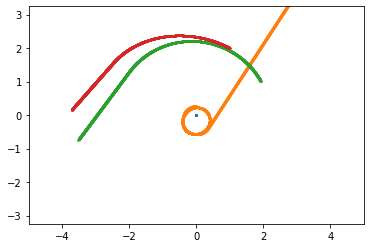

In [7]:
for i in range(len(xs)):        
    plt.scatter(xs[i],ys[i],s=1,zorder=1)
plt.axis('equal')
plt.xlim(-5,5)
plt.ylim(-5,5)

## Orbits seem sensible for a little while, then suddenly move on straight lines. 

In [8]:
#other information
import sys

sys.version

'3.8.13 (default, Apr 19 2022, 00:53:22) \n[GCC 7.5.0]'

In [9]:
rebound.__version__

'3.19.3'